# ANALYTICS: 
# Descriptive analysis complaints NY

NOTE: IN DEVELOPMENT!

+ Descriptive analysis:
    - Dataset of complaints in NY
    + Let's find relevant information, can we guess where is the party in NY?
    
+ Data preprocessing and ML algorithms (ongoing)
 


-------------------
# 1st SECTION: 
# Descriptive analysis

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
req_df = pd.read_csv('./datasets/311_Service_Requests_from_2010_to_Present.csv',header = 0, sep = ',', 
                     parse_dates = ['Created Date','Closed Date'], dayfirst = True, index_col='Created Date')

Just as a reminder:
- Dataset composed of "series". Each column is a Serie from pandas.
- With double "[ [ ] ]" will return a DataFrame, otherwise series. 
  - i.e as DF : sample_df[['Name','Salary']]
  - i.e as Serie : sample_df['Name']

In [18]:
req_df.head(3)

,Unique Key,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
Created Date,,,,,,,,,,,,,,,,,,,,,
2015-12-31 23:59:45,32310363,2016-01-01 00:55:15,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034,71 VERMILYEA AVENUE,VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
2015-12-31 23:59:44,32309934,2016-01-01 01:26:57,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105,27-07 23 AVENUE,23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2015-12-31 23:59:29,32309159,2016-01-01 04:51:03,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458,2897 VALENTINE AVENUE,VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"


In [19]:
req_df.describe(include = 'all')

,Unique Key,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
count,364558.000000,362177,364558,364558,364558,358057,364425,361560.000000,312859,312859,...,297,297,262,262,0,1,2,360528.000000,360528.000000,360528
unique,NaN,339837,1,3,24,45,18,NaN,126372,7693,...,29,34,2,187,NaN,1,2,NaN,NaN,146751
top,NaN,2015-10-09 07:12:49,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,NaN,1207 BEACH AVENUE,BROADWAY,...,FDR Dr,East/Queens Bound,Roadway,East 96th St (Exit 14) - Triborough Br (Exit 17),NaN,Manhattan Bound,Barberi,NaN,NaN,"(40.83036235589997, -73.86602154214397)"
freq,NaN,3,364558,364548,100881,75888,301372,NaN,1014,4122,...,36,26,199,6,NaN,1,1,NaN,NaN,1012
first,NaN,2015-01-01 00:20:33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2016-03-01 16:22:52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,31065947.204634,NaN,NaN,NaN,NaN,NaN,NaN,10858.496659,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.724980,-73.924946,NaN
std,733153.094662,NaN,NaN,NaN,NaN,NaN,NaN,578.263114,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.081907,0.079213,NaN
min,29607374.000000,NaN,NaN,NaN,NaN,NaN,NaN,83.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.499040,-74.254937,NaN
25%,30499378.250000,NaN,NaN,NaN,NaN,NaN,NaN,10314.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.668742,-73.972253,NaN


In [20]:
req_df.columns

Index([u'Unique Key', u'Closed Date', u'Agency', u'Agency Name',
       u'Complaint Type', u'Descriptor', u'Location Type', u'Incident Zip',
       u'Incident Address', u'Street Name', u'Cross Street 1',
       u'Cross Street 2', u'Intersection Street 1', u'Intersection Street 2',
       u'Address Type', u'City', u'Landmark', u'Facility Type', u'Status',
       u'Due Date', u'Resolution Description',
       u'Resolution Action Updated Date', u'Community Board', u'Borough',
       u'X Coordinate (State Plane)', u'Y Coordinate (State Plane)',
       u'Park Facility Name', u'Park Borough', u'School Name',
       u'School Number', u'School Region', u'School Code',
       u'School Phone Number', u'School Address', u'School City',
       u'School State', u'School Zip', u'School Not Found',
       u'School or Citywide Complaint', u'Vehicle Type',
       u'Taxi Company Borough', u'Taxi Pick Up Location',
       u'Bridge Highway Name', u'Bridge Highway Direction', u'Road Ramp',
       u'Bridge 

In [21]:
#find size
req_df.shape

(364558, 52)

In [48]:
# find diferent types of complaints
req_df['Complaint Type'].unique()

array(['Noise - Street/Sidewalk', 'Blocked Driveway', 'Illegal Parking',
       'Derelict Vehicle', 'Noise - Commercial',
       'Noise - House of Worship', 'Posting Advertisement',
       'Noise - Vehicle', 'Animal Abuse', 'Vending', 'Traffic', 'Drinking',
       'Bike/Roller/Skate Chronic', 'Panhandling', 'Noise - Park',
       'Homeless Encampment', 'Urinating in Public', 'Graffiti',
       'Disorderly Youth', 'Illegal Fireworks', 'Ferry Complaint',
       'Agency Issues', 'Squeegee', 'Animal in a Park'], dtype=object)

In [49]:
#displaying the last types of complaints
req_df['Complaint Type'][-2:]

Created Date
2015-01-01 00:01:29    Blocked Driveway
2015-01-01 00:00:50    Blocked Driveway
Name: Complaint Type, dtype: object

In [57]:
# let's display from the dataset the 10 first complains; the type and the neighbourhood
req_df[['Complaint Type','Borough']][0:10]

,Complaint Type,Borough
Created Date,,
2015-12-31 23:59:45,Noise - Street/Sidewalk,MANHATTAN
2015-12-31 23:59:44,Blocked Driveway,QUEENS
2015-12-31 23:59:29,Blocked Driveway,BRONX
2015-12-31 23:57:46,Illegal Parking,BRONX
2015-12-31 23:56:58,Illegal Parking,QUEENS
2015-12-31 23:56:30,Illegal Parking,BROOKLYN
2015-12-31 23:55:32,Illegal Parking,MANHATTAN
2015-12-31 23:54:05,Blocked Driveway,BRONX
2015-12-31 23:53:58,Illegal Parking,QUEENS


In [59]:
# Let's count how many complaints there are for each type
req_df['Complaint Type'].value_counts()

Blocked Driveway             100881
Illegal Parking               92679
Noise - Street/Sidewalk       51692
Noise - Commercial            44109
Derelict Vehicle              21661
Noise - Vehicle               19352
Animal Abuse                  10541
Traffic                        5198
Homeless Encampment            4879
Vending                        4192
Noise - Park                   4109
Drinking                       1409
Noise - House of Worship       1070
Posting Advertisement           681
Urinating in Public             641
Bike/Roller/Skate Chronic       478
Panhandling                     327
Disorderly Youth                315
Illegal Fireworks               172
Graffiti                        157
Agency Issues                     8
Squeegee                          4
Ferry Complaint                   2
Animal in a Park                  1
Name: Complaint Type, dtype: int64

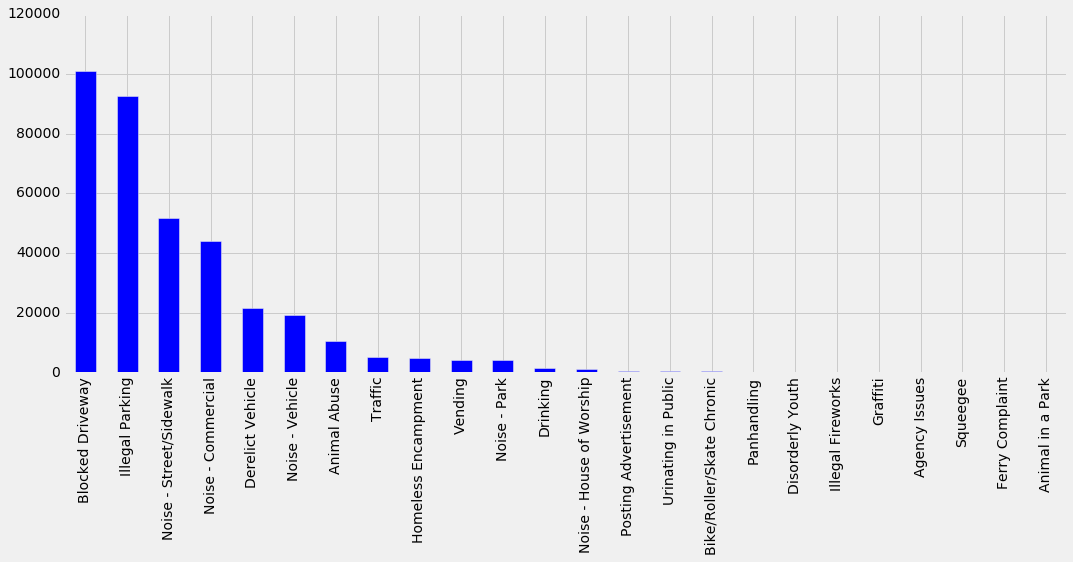

In [61]:
# Plot the amounts of complaints per type
req_df['Complaint Type'].value_counts().plot(kind='bar',figsize= (16,6))

(-1.0083468731799674,
 1.0000000001988867,
 -1.024137915376466,
 1.0053013835037421)

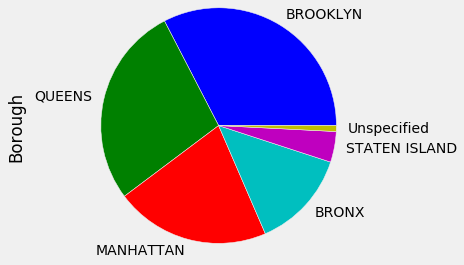

In [62]:
#Plot a pie plot with the amount of complaints per neighbourhood (borough)
req_df['Borough'].value_counts().plot(kind='pie').axis('equal')

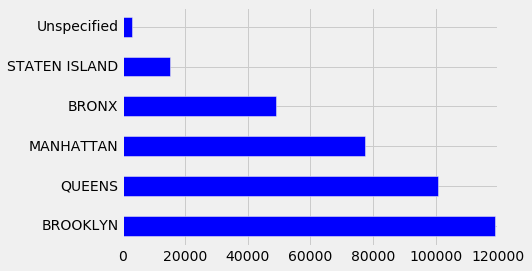

In [63]:
# plot the same using barplot
req_df['Borough'].value_counts().plot(kind='barh')

(-74.299999999999997,
 -73.599999999999994,
 40.400000000000006,
 41.000000000000007)

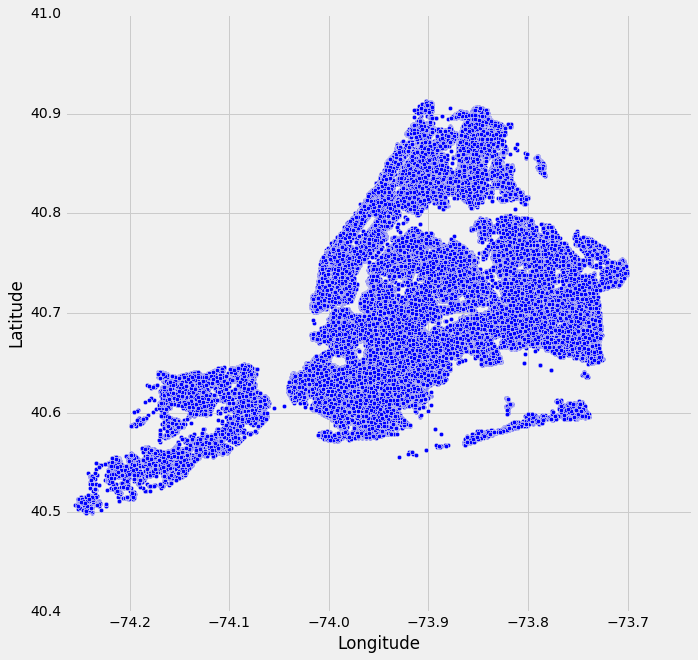

In [64]:
# Plot the location of each complain. We have the Longitude & Latitude
req_df[['Longitude','Latitude']].plot(kind='scatter',x='Longitude',y='Latitude',figsize=(10,10)).axis('equal')

(-74.299999999999997,
 -73.699999999999989,
 40.400000000000006,
 41.000000000000007)

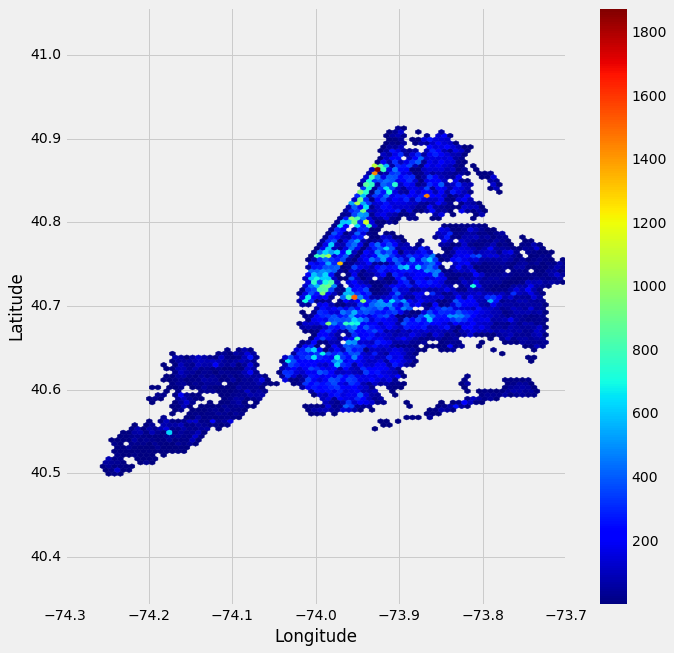

In [65]:
# Plot using a colormap to figure out the areas where there are more complaints
req_df[['Longitude','Latitude']].plot(kind='hexbin',x='Longitude',y='Latitude',
                                      gridsize=80,colormap='jet',mincnt=1,figsize=(10,10)).axis('equal')

In [66]:
# get only the complatins due to noise
req_df[req_df['Complaint Type']== 'Noise - Commercial']['Descriptor'].value_counts()

Loud Music/Party    32479
Banging/Pounding     4663
Loud Talking         4466
Car/Truck Horn       1368
Car/Truck Music      1021
Loud Television       112
Name: Descriptor, dtype: int64

In [67]:
# get tonly the complatins due to noise
req_df[req_df['Complaint Type']== 'Noise - Street/Sidewalk']['Descriptor'].value_counts()

Loud Music/Party    33488
Loud Talking        18204
Name: Descriptor, dtype: int64

In [68]:
# get only the complatins due to noise
req_df[req_df['Complaint Type']== 'Noise - House of Worship']['Descriptor'].value_counts()

Loud Music/Party    588
Banging/Pounding    296
Loud Talking        184
Loud Television       2
Name: Descriptor, dtype: int64

In [69]:
# get only the complatins due to noise
req_df[req_df['Complaint Type']== 'Noise - Vehicle']['Descriptor'].value_counts()

Car/Truck Music    10919
Engine Idling       5323
Car/Truck Horn      3110
Name: Descriptor, dtype: int64

In [70]:
# get only the complatins due to noise
req_df[req_df['Complaint Type']== 'Noise - Park']['Descriptor'].value_counts()

Loud Music/Party    3153
Loud Talking         956
Name: Descriptor, dtype: int64

In [71]:
# get only the complatins due to noise
req_df[req_df['Complaint Type']== 'Drinking']['Descriptor'].value_counts()

In Public                     971
Underage - Licensed Est       345
After Hours - Licensed Est     93
Name: Descriptor, dtype: int64

In [72]:
req_df['Descriptor'].value_counts()

No Access                         75888
Loud Music/Party                  69708
Posted Parking Sign Violation     27200
Partial Access                    24993
Loud Talking                      23810
With License Plate                21661
Blocked Hydrant                   19989
Commercial Overnight Parking      14997
Blocked Sidewalk                  13860
Car/Truck Music                   11940
Double Parked Blocking Traffic     7164
Engine Idling                      5323
Double Parked Blocking Vehicle     5167
Neglected                          5131
Banging/Pounding                   4959
Car/Truck Horn                     4478
Congestion/Gridlock                3237
Other (complaint details)          2489
In Prohibited Area                 2206
Overnight Commercial Storage       2102
Unlicensed                         1986
Unauthorized Bus Layover           1618
Truck Route Violation              1125
Tortured                           1041
In Public                           971


### Where is the party? 
After the previous descriptive analysis, we may decide that to study the complaints due to party (aiming to find the best places to party in NY) may be to look at the desctiptor field

(-74.299999999999997, -73.699999999999989, 40.5, 40.950000000000003)

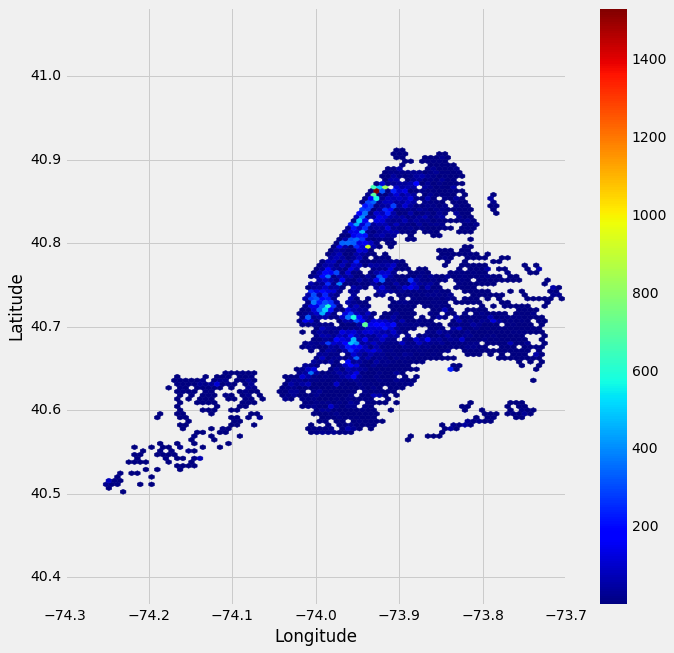

In [73]:

req_df[req_df['Descriptor']=='Loud Music/Party'].plot(kind='hexbin',x='Longitude',y='Latitude',
        gridsize=80,colormap='jet',mincnt=1,figsize=(10,10)).axis('equal')

(-74.299999999999997, -73.699999999999989, 40.5, 40.950000000000003)

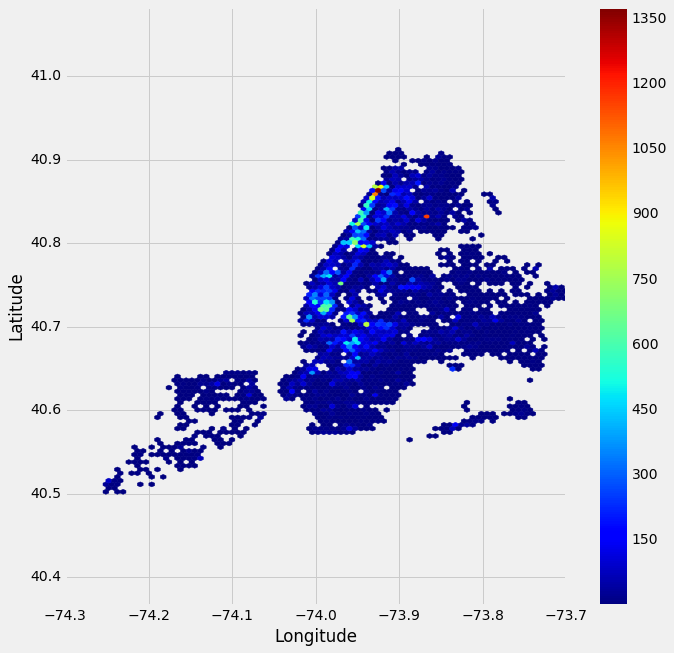

In [74]:
# Include Loud Talking & Music Party
req_df[(req_df['Descriptor']=='Loud Music/Party') | (req_df['Descriptor']=='Loud Talking')].plot(kind='hexbin',x='Longitude',y='Latitude',
        gridsize=80,colormap='jet',mincnt=1,figsize=(10,10)).axis('equal')

(-74.299999999999997, -73.699999999999989, 40.5, 40.950000000000003)

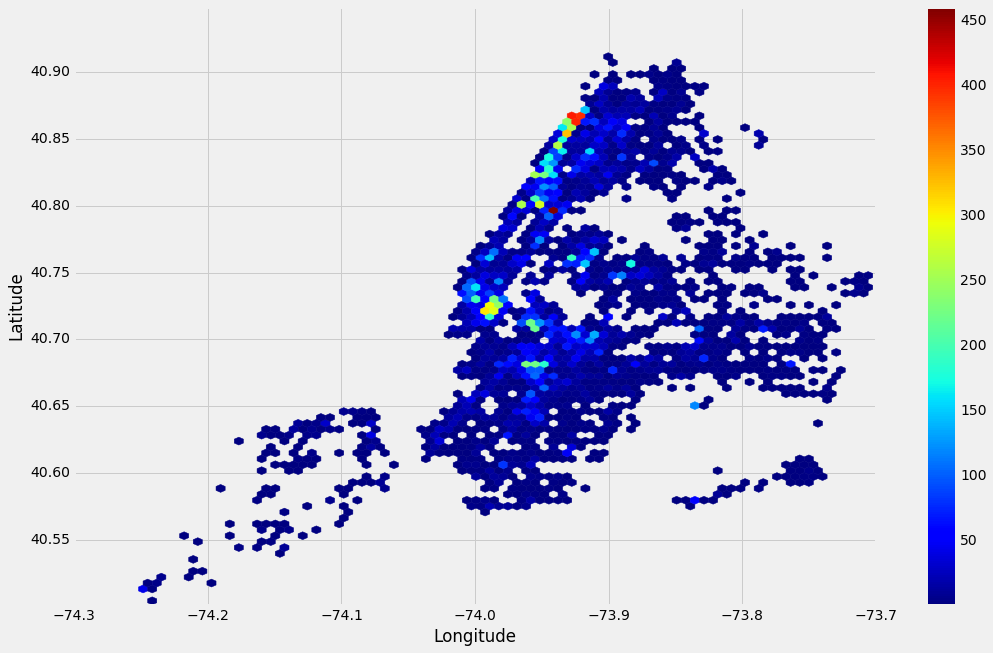

In [75]:
# Now let's look only the complaints related to party during the NIGHT
req_df[(req_df.index.hour >= 0) & (req_df.index.hour < 6) 
       & ((req_df['Descriptor']=='Loud Music/Party') | (req_df['Descriptor']=='Loud Talking'))].plot(kind='hexbin',x='Longitude',y='Latitude',
        gridsize=80,colormap='jet',mincnt=1,figsize=(16,10)).axis('equal')

(-74.150000000000006, -73.75, 40.600000000000001, 40.900000000000006)

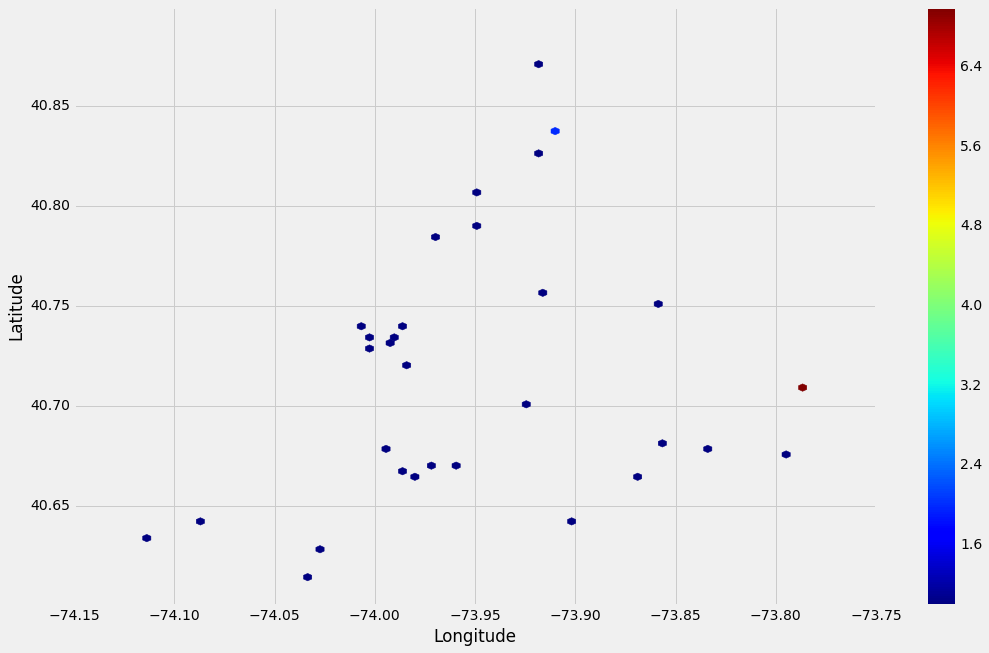

In [76]:
# Let's look now the Urinating in public complaints durint the night
req_df[(req_df.index.hour >= 0) & (req_df.index.hour < 6) 
       & ( (req_df['Complaint Type']=='Urinating in Public'))].plot(kind='hexbin',x='Longitude',y='Latitude',
        gridsize=80,colormap='jet',mincnt=1,figsize=(16,10)).axis('equal')

(-74.200000000000003,
 -73.700000000000003,
 40.549999999999997,
 40.900000000000006)

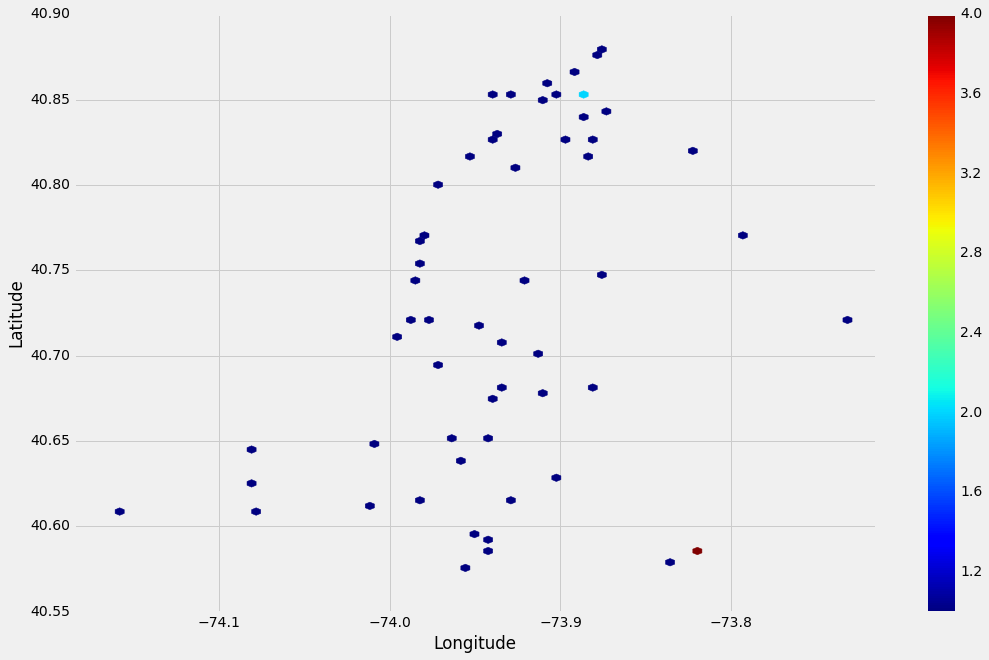

In [77]:
# Let's look now the tortured complaints during the night
req_df[(req_df.index.hour >= 0) & (req_df.index.hour < 6) 
       & ( (req_df['Descriptor']=='Tortured'))].plot(kind='hexbin',x='Longitude',y='Latitude',
        gridsize=80,colormap='jet',mincnt=1,figsize=(16,10)).axis('equal')

In [78]:
#Look at the Neighborhood (BOROUGHT) list
req_df['Borough'].unique()

array(['MANHATTAN', 'QUEENS', 'BRONX', 'BROOKLYN', 'Unspecified',
       'STATEN ISLAND'], dtype=object)

In [80]:
# Print for each neighborhood the list & amounts of each complain description (only the 5th types with more complains)
for borough in req_df['Borough'].unique():
    print borough
    print req_df[req_df['Borough'] == borough]['Descriptor'].value_counts()[:5]
    print '---------------------------------------'

MANHATTAN
Loud Music/Party                 29822
Loud Talking                      9780
Posted Parking Sign Violation     5959
Car/Truck Music                   3387
No Access                         2123
Name: Descriptor, dtype: int64
---------------------------------------
QUEENS
No Access                        30217
Partial Access                   11269
With License Plate                9919
Loud Music/Party                  8855
Posted Parking Sign Violation     7110
Name: Descriptor, dtype: int64
---------------------------------------
BRONX
No Access           13385
Loud Music/Party     8637
Loud Talking         3746
Partial Access       3678
Car/Truck Music      3029
Name: Descriptor, dtype: int64
---------------------------------------
BROOKLYN
No Access                        28091
Loud Music/Party                 20559
Posted Parking Sign Violation     9229
Partial Access                    8356
Blocked Hydrant                   8355
Name: Descriptor, dtype: int64
---------

So to conclude this descriptive analysis, we can say that the areas with more noise complaints and the ones we should visit if we wanna party are:
 - Manhattan
 - Brooklyn
 - ..

 
 On the opposite side STATEN ISLAND has the least complaints related to NOISE / PARTY, therefore it may be a good place if we want some calm plans